In [1]:
# 必要なライブラリのインストール
!pip install -q japanize-matplotlib

In [2]:
# 後で使う機能の準備
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
import japanize_matplotlib


def plot(X, title=None, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=[4, 4])
    patch = patches.Polygon(
        xy=X.T[[0, 1, 2]],
        closed=True,
        facecolor="skyblue",
        edgecolor="black",
        linewidth=3,
    )
    ax.add_patch(patch)
    patch = patches.Polygon(
        xy=X.T[[0, 3, 2]],
        closed=True,
        facecolor="pink",
        edgecolor="black",
        linewidth=3,
    )
    ax.add_patch(patch)

    x, y = X
    ax.hlines(0, x.min() - 1, x.max() + 1, color="k")
    ax.vlines(0, y.min() - 1, y.max() + 1, color="k")
    ax.set_title(title, fontsize=16)
    ax.autoscale()
    ax.axis("equal")
    ax.grid()


def multiplot(*arr, titles=None):
    num = len(arr)
    if titles is None:
        titles = [None] * num
    _, axes = plt.subplots(1, num, figsize=[4 * num, 4])
    for x, ax, title in zip(arr, axes, titles):
        plot(x, title, ax)


## 掛けられる行列 $X$

スカラーの掛け算は交換法則 $a \cdot b = b \cdot a$ が成り立ちますが、行列の積では $A \cdot B \neq B \cdot A$ となって成り立ちません。

要は、小学2年生くらいに聞いた「掛ける数」と「掛けられる数」を意識する必要があります。というより、意識すると線形代数のお気持ちが分かりやすくなります。

このノートブックでは「掛けられる行列 $X$」を下のセルで定義した行列とします。

行列 X:
[[0 1 1 0]
 [0 0 1 1]]


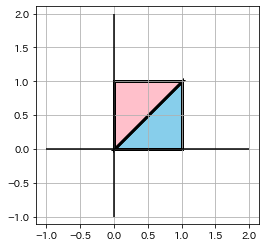

In [3]:
X = np.array(
    [
        [0, 0],  # 左下の座標
        [1, 0],  # 右下の座標
        [1, 1],  # 右上の座標
        [0, 1],  # 左上の座標
    ]
).T

print("行列 X:")
print(X)
plot(X)


行列 $X$ の各列は、正方形の各頂点の座標になっています。


## 掛ける行列 $A$


この行列 $X$ にとある行列 $A$ を掛けると、上の図の正方形はどのなるのでしょう。  
とりあえず適当な行列 $A$ を下のセルのように定義して、2つの行列の積 $Y = XA$ を計算してみましょう。

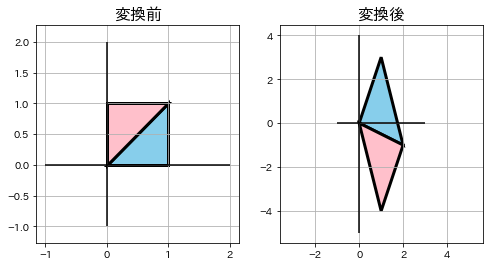

In [4]:
A = np.array(
    [
        [1, 1],
        [3, -4],
    ]
)

Y = A @ X
multiplot(X, Y, titles=["変換前", "変換後"])


当たり前ですけどなんか変わりました。

では、「どのように」変わったのでしょうか。この「掛ける行列 $A$」の性質を探るのが線形代数の醍醐味です。

<details>
<summary>コラム: 「Y = AX」vs「Y = XA」</summary>


線形代数の教科書では、$Y = AX$ のように、変換する行列 $A$ が左側で変換される行列 $X$ が右側に書くのが一般的です。
その理由は、数学の世界ではベクトルは縦向きに定義する暗黙の決まりがあるからです。その決まりに従って $X$ を定義すると次のようになります。

$$
X = \left(
\begin{array}{cccc}
  0 & 1 & 1 & 0 \\
  0 & 0 & 1 & 1
\end{array}
\right)
$$

一方、プログラミングの世界で配列を扱う場合は `[1, 2, 3]` のように横向きで定義した方が扱いやすいです。
ただし、このベクトルの向きを逆にしたら、つじつまを合わせるために行列の順番も逆にして $Y = XA$ とする必要があります。

</details>



## いろんな行列



ここからは、行列にどんな種類があるのかを見ていきます。

| 変換/行列の名前 | お気持ち                   |
| --------------- | -------------------------- |
| 単位行列        | 何もしない                 |
| 直交行列        | 回したり裏返したりする     |
| 対角行列        | （上下 or 左右に）伸ばす   |
| せん断変換      | （上下 or 左右に）歪ませる |

### 単位行列

単位行列 $I$ は何もしません。
つまり、$IX = X$ となります。スカラの $1$ みたいなものです。

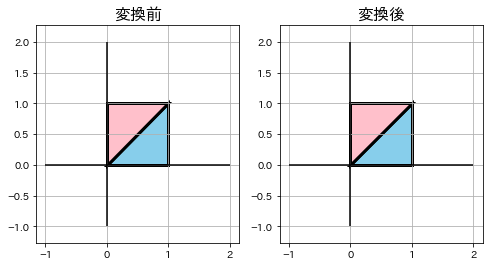

In [6]:
I = np.array(
    [
        [1, 0],
        [0, 1],
    ]
)

Y = I @ X
multiplot(X, Y, titles=["変換前", "変換後"])


### 直交行列

直交行列を掛けると $X$ は回転したり裏返ったりします。
これ他の変換に共通するのは「向きは変わるけど形はそのまま」というところです。  
データ分析とかだと、データを崩さずに変形したいときに登場します。

では、90°（$=\pi/2$）回転させてみましょう。（`theta = pi / 2` を好きな角度にすれば回転の仕方も変わります。）

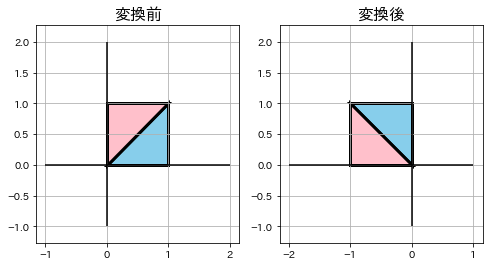

In [8]:

from numpy import sin, cos, pi

theta = pi / 2
R = np.array(
    [
        [cos(theta), -sin(theta)],
        [sin(theta), cos(theta)],
    ]
)

Y = R @ X
multiplot(X, Y, titles=["変換前", "変換後"])

直交行列の性質は転置をすると逆向きに回転するところです。（なぜでしょう？）

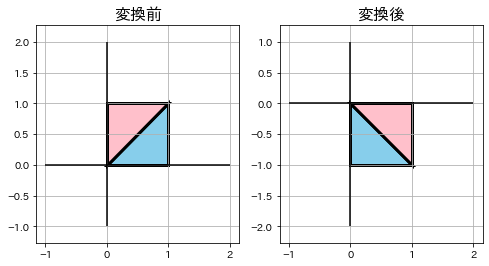

In [9]:
Y = R.T @ X
multiplot(X, Y, titles=["変換前", "変換後"])


ということは、$R^T R X$ を計算すると、左回りに $\theta$ 回転した後に、右回りに $\theta$ 回転することになるので、$R^T R X = X$ になりますね。  
したがって、$R^T R = I$ ということが分かります（$R R^T = I$ も同様）。このような性質を持った行列のことを直交行列といいます。

In [10]:
print(I)
print(R.T @ R)
print(R @ R.T)

[[1 0]
 [0 1]]
[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


次に、裏返すタイプの直交行列を掛けてみましょう。以下の定義だと、$y=x\tan\theta$ に関して線対称に裏返します。



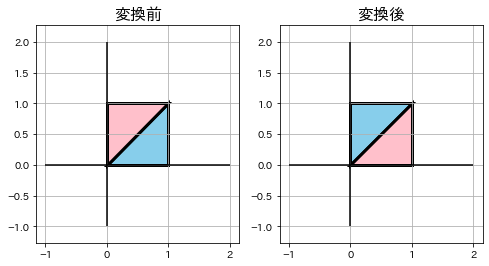

In [12]:
theta = pi / 4
U = np.array(
    [
        [cos(2 * theta), sin(2 * theta)],
        [sin(2 * theta), -cos(2 * theta)],
    ]
)

Y = U @ X
multiplot(X, Y, titles=["変換前", "変換後"])


### 対角行列

行列の左上から右下への対角線上の成分のことを対角成分といいます。対角行列は、対角成分以外が 0 で埋められています。  
なので、先程の裏返す変換をする行列は、直交行列でもあり対角行列でもあります。

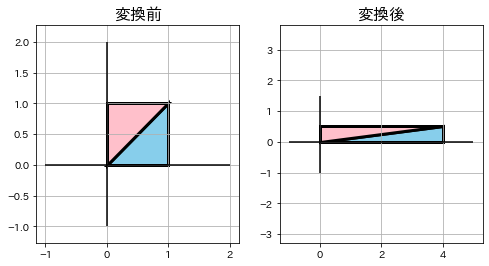

In [13]:
D = np.array(
    [
        [4, 0],  # x 方向に 4 倍
        [0, 0.5],  # y 方向に 0.5 倍
    ]
)

Y = D @ X
multiplot(X, Y, titles=["変換前", "変換後"])


びよーん、ぐしゃ（深夜テンション）

### せん断行列

僕もせん断という言葉はあまり聞いたことがないです。線形代数の教科書でよく目にする用語に言い換えると、（全ての対角成分が 1 の）三角行列です。

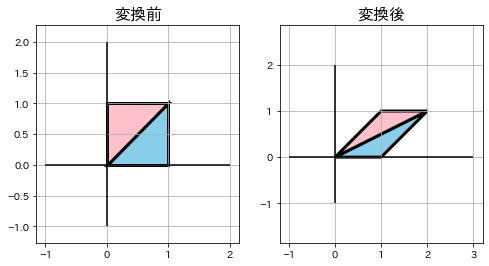

In [14]:
u = 1
U = np.array(
    [
        [1, u],  # x 方向に歪ませる
        [0, 1],  # y はそのまま
    ]
)

Y = U @ X
multiplot(X, Y, titles=["変換前", "変換後"])


上三角のときと下三角のときでは歪む軸が変わります。

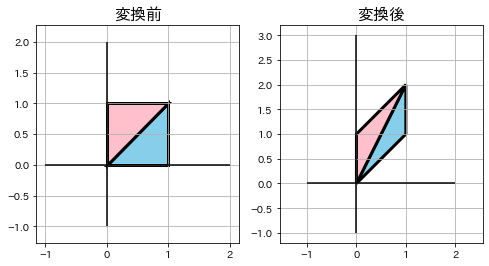

In [15]:
l = 1
L = np.array(
    [
        [1, 0],  # x はそのまま
        [l, 1],  # y 方向に歪ませる
    ]
)

Y = L @ X
multiplot(X, Y, titles=["変換前", "変換後"])


### 逆行列

逆行列 $A^{-1}$ は、名前の通り、行列 $A$ と逆のことをします。`np.linalg.inv` で求められます。

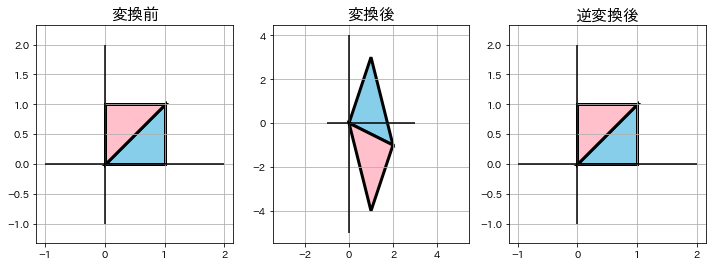

In [16]:
Y = A @ X
Z = np.linalg.inv(A) @ Y
multiplot(X, Y, Z, titles=["変換前", "変換後", "逆変換後"])

ただし、逆行列はないこともあります。例えば、下のような状況です。

Singular matrix


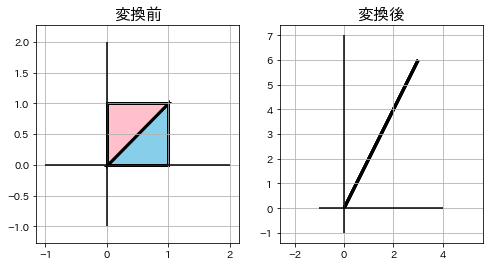

In [17]:
S = np.array(
    [
        [1, 2],
        [2, 4],
    ]
)

Y = S @ X
try:
    Z = np.linalg.inv(S) @ Y
except np.linalg.LinAlgError as e:
    print(e)
multiplot(X, Y, titles=["変換前", "変換後"])

この行列は 2 つある次元のうち 1 つを消してしまっています。消してしまったものは復元できません。  
これは $a \times 0 \div  0 = a$ という計算は出来ないことと同じです。

（2 次元の世界に行ったら戻ってこれないし、4 次元世界には行くことが出来ません。）
